# Practica VII - Data Exploration Part 7

Planejamento de Experimentos II
_ _ _
___
_ _ _

(the preprocessing part its at the end of the notebook)

---------

## Practica 7

### 10 Fold 

Practica 7, questoes:

### Questao 1

1- Realizar 10-fold Cross-Validation nos algoritmos da prática passada utilizando as métricas vista na aula de hoje (acuácia, precisão, revocação, sensitividade, especificidade, medida-F e média harmônica). Comentar se no seu cenário alguma dessa medidas apresentou algum problema, ex. se o dataset é muito desbalanceado e a acurácia retornou um valor próximo da proporção de classes significa que ela não é muito boa para julgar o desempenho do classificador nesse caso; comente sobre esses problemas para cada medida, leve em conta o desempenho dos classificadores, por ex. se todos os classificadores tiveram um desempenho ruim pode significar que a métrica não é adequada para esse cenário, ou pode ser apenas que esses classificadores que não são adequados, comente sobre isso.

In [18]:
folds = 10

raw_10_fold = meta_aval(boston, columns, target, medias_aval, folds=folds)

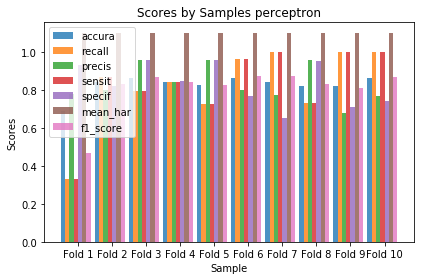

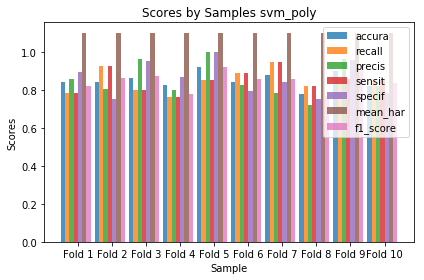

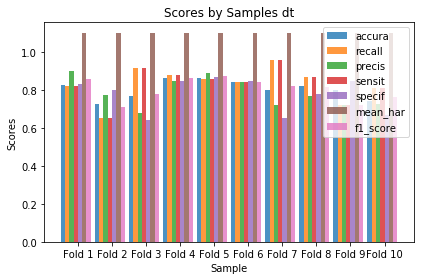

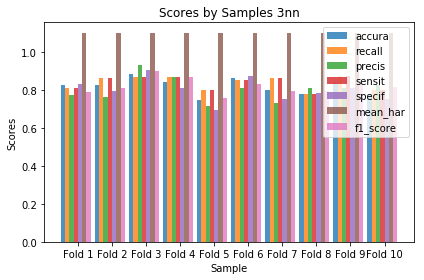

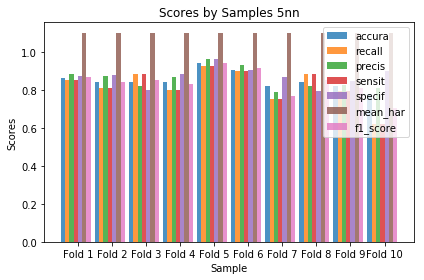

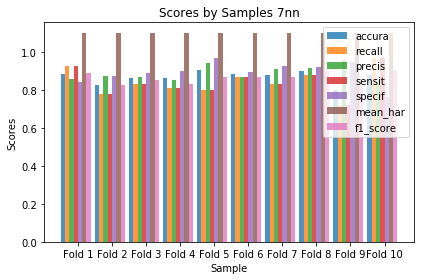

In [19]:
_10_fold_results = results_by_class(raw_10_fold["conf_mtrx"]["results"])
plot_results(_10_fold_results)

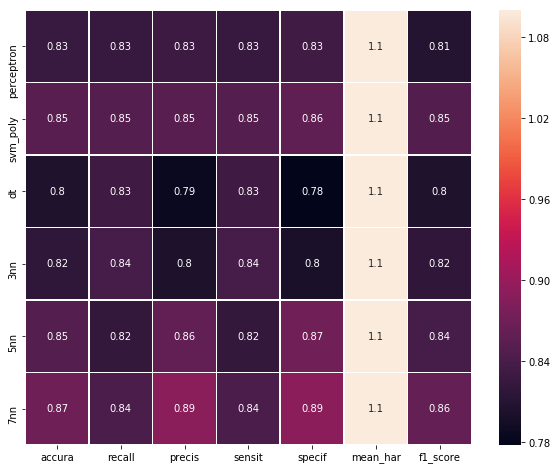

In [20]:
mean_normal = mean_plot_results(_10_fold_results)

### 1.5.1.- Avaliation

proporcao das classes :

    Proportion : 
         Low vs High : 	0.984314
     or
         High vs Low :	1.015936



    Proportion : 
         Low vs Total : 	0.496047
     or
         High vs Total :	0.503953

* para todas as métricas o menor resultado em geral pertence ao classificador Arvor de Decisão

* os dados foram pre-processando , esse e o motivo principal por o qual quase tudos so classificadores baixo tudas as metricas resultam ser "otimos" (resultados por acima de 70)

* * Além disso, as classes do dataset estão balanceadas, com uma proporção de quase 50% cada, mas nenhum classificador possui uma accuraracia trivial (igual ao ratio)

### Questao 2 

Escolha dois classificadores e plot a curva ROC e calcule a AUC para os mesmos.

Para isso divida o dataset em 80% para treino e 20% para teste. Apenas para deixar claro, a curva ROC como é uma medida de desempenho deve ser calculada no conjunto de treino.

In [43]:
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [44]:
train__, test__ = sampler_idx(boston, sample_ratio=0.8)

display(len(train__), len(train__) / len(boston.index))
display(len(test__), len(test__) / len(boston.index))

Y = boston.target
X = boston.drop(["target"], axis=1)

x_train = X.iloc[train__, :].values
y_train = Y.iloc[train__,].values

x_test = X.iloc[test__, :].values
y_test = Y.iloc[test__,].values

404

0.7984189723320159

102

0.2015810276679842

##### MLP

In [45]:
mlp_model = MLPClassifier()
mlp_model.fit(x_train, y_train)

y_pred_mlp = mlp_model.predict(x_test)
mlp_probs = mlp_model.predict_proba(x_test)

mlp_cm = confusion_matrix(y_test, y_pred_mlp)

##### NBGaussian

In [46]:
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)

y_pred_nb= nb_model.predict(x_test)
nb_probs = nb_model.predict_proba(x_test)

nb_cm = confusion_matrix(y_test, y_pred_nb)

In [47]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

##### MLP

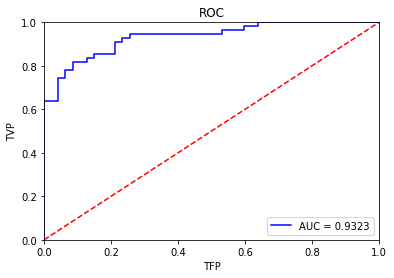

In [48]:
mlp_preds = mlp_probs[:, 0] # Requerimento da questão 3.2

tpr, fpr, threshold = roc_curve(y_test, mlp_preds)
roc_auc = auc(fpr, tpr)


plt.title('ROC')
plt.plot(fpr, tpr,'b', label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('TVP')
plt.xlabel('TFP')
plt.show()

##### NBGaussian

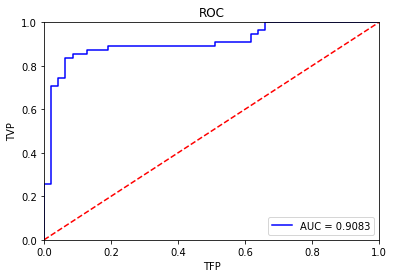

In [49]:
nb_preds = nb_probs[:, 0]
tpr, fpr, threshold = roc_curve(y_test, nb_preds)
roc_auc = auc(fpr, tpr)


plt.title('ROC')
plt.plot(fpr, tpr,'b', label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('TVP')
plt.xlabel('TFP')
plt.show()

### Questao 3

Explique o desempenho dos classificadores que você treinou na questão anterior pela curva ROC. Como a AUC sintetiza a curva ROC e como podemos utilizá-la para comparar classificadores?

---

#### Rpta

A AUC representa a área sob a curva ROC e a curva ROC é o grau de classificação obtido pelo classificador nos casos de teste.

Portanto, um classificador é bom o suficiente quando a curva está próxima ao canto superior esquerdo e, pelo mesmo, o valor de AUC é máximo (1 é o máximo)

Se for dado um classificador, ele pode ter um bom resultado nas métricas de treinamento (10 fold por exemplo), mas, ao testar a qualidade do mesmo com os casos de teste, ele gera curvas roc paralelas ou sob a linha diagonal vermelha, isso implica que é um mau classificador.

---

### Questao 4

Execute o 10-fold Cross Validation em dois algoritmos, escolha uma métrica que você ache adequada e avalie pelo teste de hipótese qual dos dois é o melhor com nível de significância de 5%.

Resumindo o procedimento:

- Executar o 10-fold CV para dois algoritmos
- Escolher o teste estatístico adequado
- Executar a função do teste e verificar se o pvalue atinge o nível de signifiância pedido

No módulo stats da biblioteca scipy tem vários testes já implementados sendo necessário apenas chamar o teste.

In [50]:
from sklearn.metrics import f1_score

In [51]:
## 10 Folds

Y = boston.target
X = boston.drop(["target"], axis=1)

kf = KFold(n_splits=10)

mlp_container = []
nb_container = []
for train_index, test_index in kf.split(X):
    x_train = X.iloc[train_index, :].values
    y_train = Y.iloc[train_index,].values

    x_test = X.iloc[test_index, :].values
    y_test = Y.iloc[test_index,].values
    
    #### mlp
    
    mlp_model = MLPClassifier()
    mlp_model.fit(x_train, y_train)

    y_pred_mlp = mlp_model.predict(x_test)
    f1_mlp = f1_score(y_test, y_pred_mlp)
    
    mlp_container += [copy(f1_mlp)]
    
    #### gaussiannb
    
    nb_model = GaussianNB()
    nb_model.fit(x_train, y_train)

    y_pred_nb= nb_model.predict(x_test)
    f1_nb = f1_score(y_test, y_pred_nb)
    
    nb_container += [copy(f1_nb)]

In [52]:
# importando a função do t test para amostrar independentes
from scipy.stats import ttest_ind

print(ttest_ind(mlp_container, nb_container))

Ttest_indResult(statistic=0.7155084061896301, pvalue=0.48347386788713786)


    com o pvalue de >~0.45 podemos afirmar a hipótese nula que os dois algoritmos são iguais, portanto, alg2 
    é melhor que alg1, considerando que quanto menor a medida melhor

    com o pvalue de ~0.5 não temos evidência para refutar a hipótese nula, logo não podemos afirmar que um dos 
    algoritmos é melhor que o outro

    com o pvalue de <~0.45 podemos refutar a hipótese nula que os dois algoritmos são iguais, portanto, alg1 
    é melhor que alg2, considerando que quanto menor a medida melhor

#### Rpta

neste caso, **o pvalue foi 0.48347386788713786**, então não podemos afirmar que a MLP é melhor que o *Classificador Naive Bayes Gaussiano

----
___
----

## 0.- Load First : Libraries and Functions

In [1]:
import pandas as pd
import numpy as np

import matplotlib as m_plt
from matplotlib import pyplot as plt
import matplotlib.mlab as mlabQ

import seaborn as sns

from copy import copy
from pprint import pprint

import sys
import os

import personal_plotter as p_plt

from sklearn import preprocessing

In [2]:
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import Perceptron

from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from numpy import mean, std

from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

def classificacao(data, columns, target, score=accuracy_score, score_name='acurácia', 
                  folds=5, plot=False):
    """
    Executa classificação do conjunto de dados passado
    ---------------------------------------------------------------
    data:       DataFrame. Conjunto de dados
    columns:    Lista de inteiros. Índice das colunas utilizadas no treinamento e teste
    target:     Inteiro. Índice da coluna alvo
    score:      Função. A função que calcula a medida de desempenho desejada. Deve ser uma 
                função que compara dois vetores, o primeiro vetor são os valores preditos
                pelo classificador, o segundo os rótulos reais
                Vide exemplo das funções em 
                http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
                como por exemplo, sklearn.metrics.accuracy_score
                http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
    score_name: String. Uma string com o nome da medida de desempenho
    folds:      Inteiro. Número de folds na validação cruzada
    plot:       Booleano. True para plotar os gráficos False para não plotar
    ---------------------------------------------------------------
    Realiza a classificação em 6 modelos (perceptron, 
    SVM com kernel polinomial de grau 3, Árvore de decisão, 3NN, 5NN, e 7NN)
    Plot o gráfico de desempenho para cada classificador.
    Retorna um dicionário com os classificadores treinados e as medidas de desempenho
    """
    import numpy as np
    # inicializa os modelos com os parâmetros solicitados
    prcp = Perceptron()
    svm_n = SVC(C=10*len(data), kernel='poly', degree=3, gamma=1, coef0=1, cache_size=500, max_iter=1e6)
    dt = DecisionTreeClassifier(criterion='gini', splitter='best', min_samples_split=int(len(data)*0.1))
    _3nn = KNeighborsClassifier(n_neighbors=3, weights='uniform', algorithm='auto')
    _5nn = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto')
    _7nn = KNeighborsClassifier(n_neighbors=7, weights='uniform', algorithm='auto')
    
    clfs = [prcp, svm_n, dt, _3nn, _5nn, _7nn]
    clfs_names = ['perceptron', 'svm_poly', 'dt', '3nn', '5nn', '7nn']
    
    # prepara validação cruzada
    cv = KFold(n_splits=folds, shuffle=True)
    
    # itera para cada classificador fazendo treino e teste
    results = {'perceptron':[], 'svm_poly':[], 'dt':[], '3nn':[], '5nn':[], '7nn':[]}
    for c, c_name in zip(clfs, clfs_names):
        for train_index, test_index in cv.split(data):
            
            # separa conjunto de treino e de teste
            x_train, y_train = data.iloc[train_index, columns], data.iloc[train_index, target]
            x_test, y_test = data.iloc[test_index, columns], data.iloc[test_index, target]
            
            # faz o treino do modelo
            clf = c.fit(X=x_train, y=y_train)
            
            # valores predito pelo classificador
            y_pred = clf.predict(x_test)
            # rótulos verdadeiros convertidos para array
            y_test = np.array(y_test)
            
            # realiza predição no conjunto de teste e salva o resultado
            results[c_name].append( score(y_test, y_pred) )
    
    if not plot:
        return {'results': results, 'clfs':clfs}
    # faz o plot de desempenho dos classificadores
    plt.figure(figsize=(8,8))
    plt.bar(range(1, len(clfs)+1), [mean(results[name]) for name in clfs_names], 
                                yerr=[std(results[name]) for name in clfs_names])
    plt.xticks(range(1, len(clfs)+1), clfs_names, rotation=45)
    title = 'Desempenho dos classificadores - %s'%(score_name)
    plt.title(title)
    plt.show()
    
    return {'results': results, 'clfs':clfs}

In [3]:
def cnf_mtrx_scores(conf_mtrx_input, alpha=10):
    tn, fp, fn, tp = conf_mtrx_input.ravel()
    
    accura = (tp + tn) / (tp + tn + fp + fn)
    
    recall = tp / (tp + fn)
    precis = tp / (tp + fp)

    sensit = tp / (tp + fn)
    specif = tn / (tn + fp)
    
    mean_har = ((1 + alpha) * precis * recall) / (alpha * precis * recall)
    f1_score = 2 / (1/precis + 1/recall)
    
    return [accura, recall, precis, sensit, specif, mean_har, f1_score, alpha]

### by classificator
def results_by_class(result_container):
    col_names = ["accura", "recall", "precis", "sensit", "specif", "mean_har", "f1_score"]
    scores_by_class = {}
    for ref_key in result_container.keys():
        current_data = result_container[ref_key]
        score_container = pd.DataFrame(0, index=np.arange(len(current_data)), columns=col_names)
        
        alpha = -1
        for ii in range(len(current_data)):
            score_vals = cnf_mtrx_scores(current_data[ii])
            alpha = score_vals[-1]
            score_container.loc[ii] = score_vals[:-1]
            score_container.loc[ii] = np.round(score_container.loc[ii].values, 3)
        
        score_container.rename(index=str, columns={"mean_har": "mean_har" + str(alpha)})
        scores_by_class[ref_key] = score_container.copy()
    
    return scores_by_class

In [4]:
def plot_results(result_to_plot, bar_width=1):
    
    for ref_key in result_to_plot.keys():
        current_results = result_to_plot[ref_key]

        # data to plot
        n_groups = len(current_results)

        # create plot
        fig, ax = plt.subplots()
        index = np.arange(n_groups)
        opacity = 0.8


        cols = len(current_results.columns) + 1
        under_poss = (np.arange(cols * n_groups) + 1).reshape(n_groups, cols).T
        id_x = 0
        for col_name in current_results.columns:
            plt.bar(under_poss[id_x], current_results[col_name].values.tolist(), bar_width,
                         alpha=opacity,
                         label=col_name)
            id_x += 1

        specific_label = ["Fold " + str(jj) for jj in (np.arange(n_groups) + 1).tolist()]
        specific_label = tuple(specific_label)

        plt.xlabel('Sample')
        plt.ylabel('Scores')
        plt.title('Scores by Samples ' + ref_key)
        plt.xticks(under_poss.mean(axis=0), specific_label)
        plt.legend()

        plt.tight_layout()
        plt.show()

In [5]:
def mean_plot_results(result_to_plot, bar_width=1):
    col_names = ["accura", "recall", "precis", "sensit", "specif", "mean_har", "f1_score"]
    mean_pd = pd.DataFrame(0, index=np.arange(len(result_to_plot)), columns=col_names)
    
    
    
    id_x = 0
    for ref_key in result_to_plot.keys():
        mean_pd.loc[id_x] = result_to_plot[ref_key].mean().values.tolist()
        id_x += 1
    
    mean_pd.index = result_to_plot.keys()
    
    plt.figure(figsize=(10,8))
    sns.heatmap(mean_pd, annot=True, linewidths=.5, 
                vmin=mean_pd.min().min(), 
                vmax=mean_pd.max().max())
    
    return mean_pd

In [6]:
def sampler_idx(data_frame, sample_ratio=0.8):
    num_data = data_frame.shape[0]

    index_list = np.arange(num_data, dtype=int)
    np.random.shuffle(index_list)

    train__ = index_list[:int(num_data * sample_ratio)]
    test__ = index_list[int(num_data * sample_ratio):]

    return train__, test__

## 1.- Data - Boston House Pricing (load and preprocesing)

### 1.1.- Retrieving Data

#### 1.1.1.- Reading Data

In [7]:
try :
    boston_dataset = pd.read_csv("./boston/housing.data", sep="\t", header=None)
    boston_dataset.columns = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
except:
    print("ERROR, DATA NOT LOADED")
else:
    print("""DATA SUCCESSFULLY LOADED\n
    \tRows\t:\t{:d}\t|\tColumns\t:\t{:d}""".format(boston_dataset.shape[0], boston_dataset.shape[1]))

DATA SUCCESSFULLY LOADED

    	Rows	:	506	|	Columns	:	14


#### 1.1.2.- Data Labels
0. **CRIM**      :  *per capita crime rate by town*
2. **ZN**        :  *proportion of residential land zoned for lots over 25,000 sq.ft.*
3. **INDUS**     :  *proportion of non-retail business acres per town*
4. **CHAS**      :  *Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)*
5. **NOX**       :  *nitric oxides concentration (parts per 10 million)*
6. **RM**        :  *average number of rooms per dwelling*
7. **AGE**       :  *proportion of owner-occupied units built prior to 1940*
8. **DIS**       :  *weighted distances to five Boston employment centres*
9. **RAD**       :  *index of accessibility to radial highways*
10. **TAX**      :  *full-value property-tax rate per \$10 000*
11. **PTRATIO**  :  *pupil-teacher ratio by town*
12. **B**        :  *1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town*
13. **LSTAT**    :  *\% lower status of the population*
14. **MEDV**     :  *Median value of owner-occupied homes in \$1000's*

#### 1.1.3.- Basic Data Exploration

the pre-processing and the pca convertion its at the end of the notebook

In [8]:
boston_dataset.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88,11.9


In [9]:
case_data_Boston = boston_dataset.copy()
del boston_dataset

### 1.2 Atributes Conversion (PreProcessing)

High    255
Low     251
Name: target, dtype: int64

Proportion : 
	 Low vs High : 	0.984314
 or
	 High vs Low :	1.015936



Proportion : 
	 Low vs Total : 	0.496047
 or
	 High vs Total :	0.503953


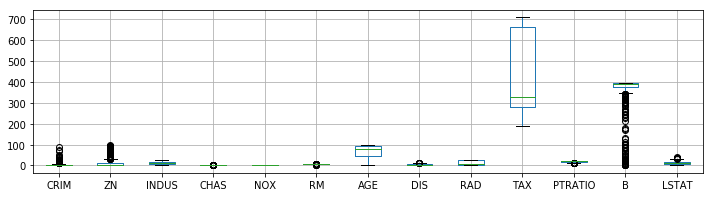

array(['High', 'Low'], dtype=object)

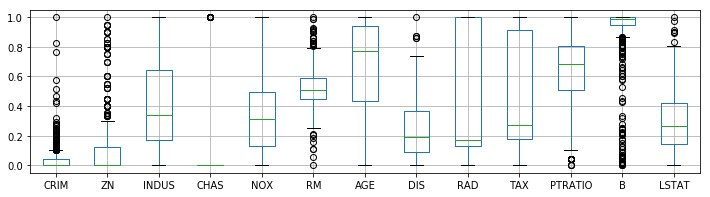

In [10]:
## Creating Targets

targets = p_plt.make_targets(case_data_Boston.MEDV, samples=2, labels=["Low","High"])

case_data_Boston.drop(columns=["MEDV"], inplace=True)
case_data_Boston["target"] = targets

display(case_data_Boston.target.value_counts())
[high_samples_amount, low_samples_amount] = case_data_Boston.target.value_counts().values.tolist()
print("Proportion : \n\t Low vs High : \t{:f}\n or\n\t High vs Low :\t{:f}".format(
    low_samples_amount / high_samples_amount, high_samples_amount / low_samples_amount))

print("\n\n")
print("Proportion : \n\t Low vs Total : \t{:f}\n or\n\t High vs Total :\t{:f}".format(
    low_samples_amount / case_data_Boston.target.value_counts().values.sum(), 
    high_samples_amount / case_data_Boston.target.value_counts().values.sum()))


target = case_data_Boston.target.copy()
case_data_Boston.drop(columns=["target"], inplace=True)

case_data_Boston.boxplot(figsize=(12,3))
plt.show()

## Resizing

t__ = case_data_Boston.TAX
t__ = (t__ - t__.min()) / (t__.max() - t__.min())
t__ = t__ * 100
case_data_Boston.TAX = t__.values.copy()

t__ = case_data_Boston.B
t__ = (t__ - t__.min()) / (t__.max() - t__.min())
t__ = t__ * 100

case_data_Boston.B = t__.values.copy()

case_data_Boston = (case_data_Boston - case_data_Boston.min()) / (case_data_Boston.max() - case_data_Boston.min())

case_data_Boston.boxplot(figsize=(12,3))

## Binarizing Targets

lbl = preprocessing.LabelEncoder()
lbl.fit(target)
display(lbl.classes_)
target_vanilla = lbl.transform(target)

boston = case_data_Boston.copy()
boston["target"] = target_vanilla

del case_data_Boston

#### 1.2.1 PCA and Atributes to Use

In [11]:
eigvals, eigvect = np.linalg.eig(boston[boston.columns.tolist()[:-1]].cov())

eigvect = pd.DataFrame(eigvect, index=boston.columns.tolist()[:-1], columns=boston.columns.tolist()[:-1])

eigvals = (eigvals / eigvals.sum()) * 100
eigvals = pd.DataFrame(eigvals, index=boston.columns.tolist()[:-1], 
             columns=["relevance"]).sort_values(by="relevance", ascending=True)

In [12]:
rel_ = eigvals.cumsum().sort_values(by="relevance", ascending=False)
display(rel_[rel_.relevance > 10])

pca_colums = rel_[rel_.relevance > 10].index.tolist()

,relevance
CRIM,100.000000
ZN,46.530759
INDUS,33.985159
CHAS,25.446529
NOX,19.184885
RM,14.279260
AGE,10.509197


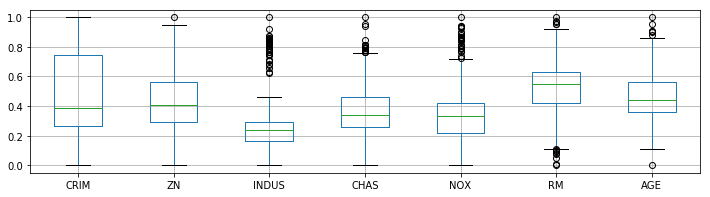

In [13]:
### Aplying PCA

temp = np.dot(
    eigvect[pca_colums].values.T, 
    boston[boston.columns.tolist()[:-1]].values.T).T

temp = pd.DataFrame(temp, columns=pca_colums)
temp = (temp - temp.min()) / (temp.max() - temp.min())
temp.boxplot(figsize=(12,3))

temp["target"] = boston.target

boston = temp

In [14]:
def prob_per_class(df_data):
    prob = df_data.target.value_counts() / df_data.target.value_counts().sum()
    return prob

In [15]:
from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import label_binarize

In [16]:
def meta_aval(dataset, columns, target, medias_aval, folds=-1, function_class=classificacao):
    output = {}
    if folds == -1:
        for aval_name, med_aval in medias_aval.items():
            output[aval_name] = function_class(dataset, columns, target, med_aval, aval_name)
    else:
        for aval_name, med_aval in medias_aval.items():
            output[aval_name] = function_class(dataset, columns, target, med_aval, aval_name, folds=folds)
    
    return output

In [17]:
medias_aval = {'conf_mtrx': confusion_matrix}

target = len(boston.columns) - 1
columns = list(range(target))

print(columns)
print(target)

[0, 1, 2, 3, 4, 5, 6]
7
